# Predictive Modeling Setup: Data Preprocessing and EDA

In [20]:
import pandas as pd
df = pd.read_csv('nga-rainfall-adm2-full.csv',low_memory=False)
df

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,#date,#adm2+id,#adm2+code,#indicator+n_pixels+num,#indicator+rfh+num,#indicator+rfh_avg+num,#indicator+r1h+num,#indicator+r1h_avg+num,#indicator+r3h+num,#indicator+r3h_avg+num,#indicator+rfq+pct,#indicator+r1q+pct,#indicator+r3q+pct,#status
1,1981-01-01,22980,NG029014,28.0,4.3571,3.2274,NaN,NaN,NaN,NaN,113.7317,NaN,NaN,final
2,1981-01-11,22980,NG029014,28.0,2.75,3.7071,NaN,NaN,NaN,NaN,89.0074,NaN,NaN,final
3,1981-01-21,22980,NG029014,28.0,7.0714,6.0607,14.1786,12.9952,NaN,NaN,109.1379,105.146,NaN,final
4,1981-02-01,22980,NG029014,28.0,4.3214,9.3012,14.1429,19.069,NaN,NaN,65.1794,83.0535,NaN,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191836,2024-03-11,23001,NG030013,33.0,18.5758,33.0414,93.6667,68.3,115.0606,103.6051,61.9739,132.3968,110.0837,final
1191837,2024-03-21,23001,NG030013,33.0,13.6667,36.7737,90.7273,93.3232,127.5152,137.9192,44.6852,97.4875,92.9664,final
1191838,2024-04-01,23001,NG030013,33.0,40.3333,40.6788,72.5758,110.4939,166.697,176.1283,99.2437,68.531,94.9329,prelim
1191839,2024-04-11,23001,NG030013,33.0,20.7576,43.4556,74.7576,120.9081,186.4545,217.0303,53.1571,64.7459,86.5323,prelim


In [21]:
df.shape

(1191841, 14)

In [22]:
df.describe()

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
count,1191841,1191841,1191841,1191841,1191841,1191841,1190313,1190313,1185729,1185729,1191841,1190313,1185729,1191841
unique,1561,765,737,141,201746,22381,308539,24236,465353,26267,624624,609722,582732,3
top,2002-08-21,1000217,NG020025,1.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,final
freq,764,1560,4680,40560,157150,131320,120640,97189,46989,32349,133078,98231,33151,1189548


In [23]:
df.columns

Index(['date', 'adm2_id', 'ADM2_PCODE', 'n_pixels', 'rfh', 'rfh_avg', 'r1h',
       'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q', 'version'],
      dtype='object')

In [24]:
df['date']=df['date'].replace('#date','1900-01-01') #placeholder for invalid date entry
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d',errors='coerce')
df=df[(df['date'].dt.year>=2000)&(df['date'].dt.year<=2024)]

In [25]:
df.isnull().sum()

date          0
adm2_id       0
ADM2_PCODE    0
n_pixels      0
rfh           0
rfh_avg       0
r1h           0
r1h_avg       0
r3h           0
r3h_avg       0
rfq           0
r1q           0
r3q           0
version       0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
df.values

array([[Timestamp('2000-01-01 00:00:00'), '22980', 'NG029014', ...,
        '76.6756', '118.0955', 'final'],
       [Timestamp('2000-01-11 00:00:00'), '22980', 'NG029014', ...,
        '103.7028', '134.2184', 'final'],
       [Timestamp('2000-01-21 00:00:00'), '22980', 'NG029014', ...,
        '103.4376', '137.9585', 'final'],
       ...,
       [Timestamp('2024-04-01 00:00:00'), '23001', 'NG030013', ...,
        '68.531', '94.9329', 'prelim'],
       [Timestamp('2024-04-11 00:00:00'), '23001', 'NG030013', ...,
        '64.7459', '86.5323', 'prelim'],
       [Timestamp('2024-04-21 00:00:00'), '23001', 'NG030013', ...,
        '107.8742', '102.3133', 'prelim']], dtype=object)

In [28]:
df=df.dropna()
df

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
685,2000-01-01,22980,NG029014,28.0,2.2143,3.2274,5.3214,9.9821,262.75,220.9571,87.6863,76.6756,118.0955,final
686,2000-01-11,22980,NG029014,28.0,6.75,3.7071,11.0714,10.319,204.0,149.4417,134.9467,103.7028,134.2184,final
687,2000-01-21,22980,NG029014,28.0,4.8214,6.0607,13.7857,12.9952,117.6429,82.5226,88.7956,103.4376,137.9585,final
688,2000-02-01,22980,NG029014,28.0,2.3214,9.3012,13.8929,19.069,72.6071,62.3286,51.1945,82.1935,114.2109,final
689,2000-02-11,22980,NG029014,28.0,2.2143,15.769,9.3571,31.131,64.9643,63.6548,34.7358,47.0622,101.7779,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191836,2024-03-11,23001,NG030013,33.0,18.5758,33.0414,93.6667,68.3,115.0606,103.6051,61.9739,132.3968,110.0837,final
1191837,2024-03-21,23001,NG030013,33.0,13.6667,36.7737,90.7273,93.3232,127.5152,137.9192,44.6852,97.4875,92.9664,final
1191838,2024-04-01,23001,NG030013,33.0,40.3333,40.6788,72.5758,110.4939,166.697,176.1283,99.2437,68.531,94.9329,prelim
1191839,2024-04-11,23001,NG030013,33.0,20.7576,43.4556,74.7576,120.9081,186.4545,217.0303,53.1571,64.7459,86.5323,prelim


In [29]:
entry_2000=df[df['date'].dt.year==2000]
entry_2000.shape[0] #observing the difference of entries in beginning year to current year

27504

In [30]:
entry_2024=df[df['date'].dt.year==2024]
entry_2024.shape[0]

9168

In [31]:
entry_by_year=df['date'].dt.year.value_counts() #grouping no. of entries by year
entry_by_year

date
2000    27504
2013    27504
2023    27504
2022    27504
2021    27504
2020    27504
2019    27504
2018    27504
2017    27504
2016    27504
2015    27504
2014    27504
2012    27504
2001    27504
2011    27504
2010    27504
2009    27504
2008    27504
2007    27504
2006    27504
2005    27504
2004    27504
2003    27504
2002    27504
2024     9168
Name: count, dtype: int64

From the above, we can see that the number of entries per year are exactly the same (except for 2024 to date) I do not need to perform operations on each year to be equal for accurate prediction

In [32]:
#checking for outliers and removing them using iqr method
cleaned_df=None
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_b = q1 - (1.5 * iqr)
    upper_b = q3 + (1.5 * iqr)
    outliers = df[(df[column] < lower_b) | (df[column] > upper_b)]
    return outliers

def remove_outliers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_b = q1 - (1.5 * iqr)
    upper_b = q3 + (1.5 * iqr)
    return df[(df[column]>=lower_b)&(df[column]<=upper_b)] #filter out outliers
              
df_copy=df.copy() #save copy of original df
              
column_check = ['rfh', 'r1h', 'r3h', 'rfh_avg', 'r1h_avg', 'r3h_avg']

df[column_check].dtypes #to check the data type ~ they all came out as objects

for column in column_check: 
    df[column]=pd.to_numeric(df[column],errors='coerce') #to ensure all data is numeric
    df.dropna(subset=column_check,inplace=True) #drop rows with NaN value if *any* after each conversion
    outliers = detect_outliers(df, column)
    print(f'Outliers in {column}: {outliers.shape[0]} found')

Outliers in rfh: 12317 found
Outliers in r1h: 5305 found
Outliers in r3h: 5048 found
Outliers in rfh_avg: 3168 found
Outliers in r1h_avg: 3024 found
Outliers in r3h_avg: 3600 found


In [33]:
for column in column_check:
    cleaned_df=remove_outliers(df,column)
    print(f'remianing rows of {column} w/o outliers: {cleaned_df.shape[0]}')
    

remianing rows of rfh w/o outliers: 656947
remianing rows of r1h w/o outliers: 663959
remianing rows of r3h w/o outliers: 664216
remianing rows of rfh_avg w/o outliers: 666096
remianing rows of r1h_avg w/o outliers: 666240
remianing rows of r3h_avg w/o outliers: 665664


In [34]:
cleaned_df.shape

(665664, 14)

In [35]:
df=cleaned_df #update df

In [36]:
dt_entry=df['date'].dt.year.value_counts()
dt_entry #datetime entry clarity

date
2000    27354
2013    27354
2023    27354
2022    27354
2021    27354
2020    27354
2019    27354
2018    27354
2017    27354
2016    27354
2015    27354
2014    27354
2012    27354
2001    27354
2011    27354
2010    27354
2009    27354
2008    27354
2007    27354
2006    27354
2005    27354
2004    27354
2003    27354
2002    27354
2024     9168
Name: count, dtype: int64

In [37]:
df

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
685,2000-01-01,22980,NG029014,28.0,2.2143,3.2274,5.3214,9.9821,262.7500,220.9571,87.6863,76.6756,118.0955,final
686,2000-01-11,22980,NG029014,28.0,6.7500,3.7071,11.0714,10.3190,204.0000,149.4417,134.9467,103.7028,134.2184,final
687,2000-01-21,22980,NG029014,28.0,4.8214,6.0607,13.7857,12.9952,117.6429,82.5226,88.7956,103.4376,137.9585,final
688,2000-02-01,22980,NG029014,28.0,2.3214,9.3012,13.8929,19.0690,72.6071,62.3286,51.1945,82.1935,114.2109,final
689,2000-02-11,22980,NG029014,28.0,2.2143,15.7690,9.3571,31.1310,64.9643,63.6548,34.7358,47.0622,101.7779,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191836,2024-03-11,23001,NG030013,33.0,18.5758,33.0414,93.6667,68.3000,115.0606,103.6051,61.9739,132.3968,110.0837,final
1191837,2024-03-21,23001,NG030013,33.0,13.6667,36.7737,90.7273,93.3232,127.5152,137.9192,44.6852,97.4875,92.9664,final
1191838,2024-04-01,23001,NG030013,33.0,40.3333,40.6788,72.5758,110.4939,166.6970,176.1283,99.2437,68.531,94.9329,prelim
1191839,2024-04-11,23001,NG030013,33.0,20.7576,43.4556,74.7576,120.9081,186.4545,217.0303,53.1571,64.7459,86.5323,prelim


In [16]:
df.to_csv(r"C:\Users\Student\Desktop\nga_rainfall_indicator_prediction_model\nigeria_rainfall_processed_ds.csv", index=False)


C:\Users\Student\AppData\Local\Temp\ipykernel_20004\509346485.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\Student\AppData\Local\Temp\ipykernel_20004\509346485.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=plot_col, inplace=True)


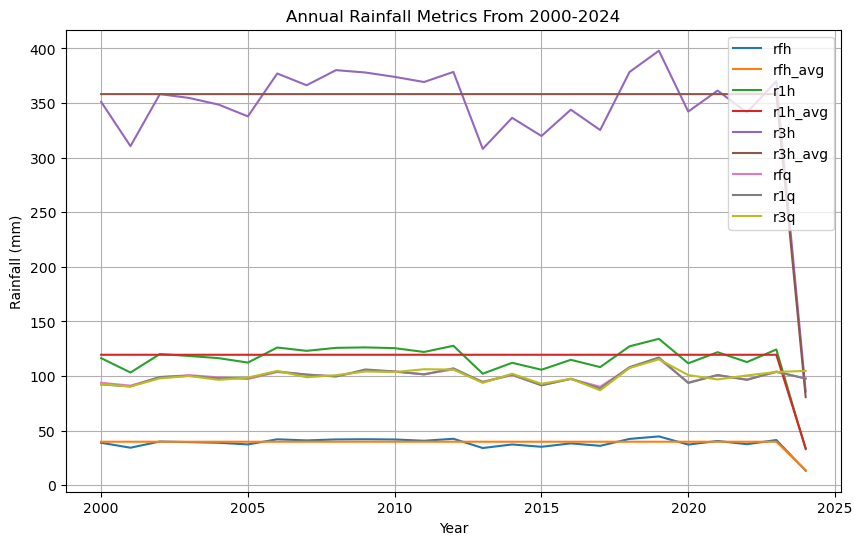

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime if it is not already
df['date'] = pd.to_datetime(df['date'])

# Create a new column 'year' from the 'date' column using .loc to avoid the warning
df.loc[:, 'year'] = df['date'].dt.year

# Identify the columns to plot, excluding the specified ones
plot_col = [col for col in df.columns if col not in ['adm2_id', 'ADM2_PCODE', 'n_pixels', 'version', 'date', 'year']]

# Convert columns to numeric, handling non-convertible values
for col in plot_col:
    df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')

# Remove any rows with NaNs created by non-numeric values
df.dropna(subset=plot_col, inplace=True)

# Group by year and calculate the mean of the specified columns
annual_data = df.groupby('year')[plot_col].mean()

# Plotting
plt.figure(figsize=(10, 6))
for col in plot_col:
    plt.plot(annual_data.index, annual_data[col], label=col)

plt.title('Annual Rainfall Metrics From 2000-2024')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()


created a line chart to have an idea of the trends in rainfall patterns after eda before training the ds